# Task 1
extracting colour content, luminance and edge detection to compare the images and then displaying images ranked in order of similarity

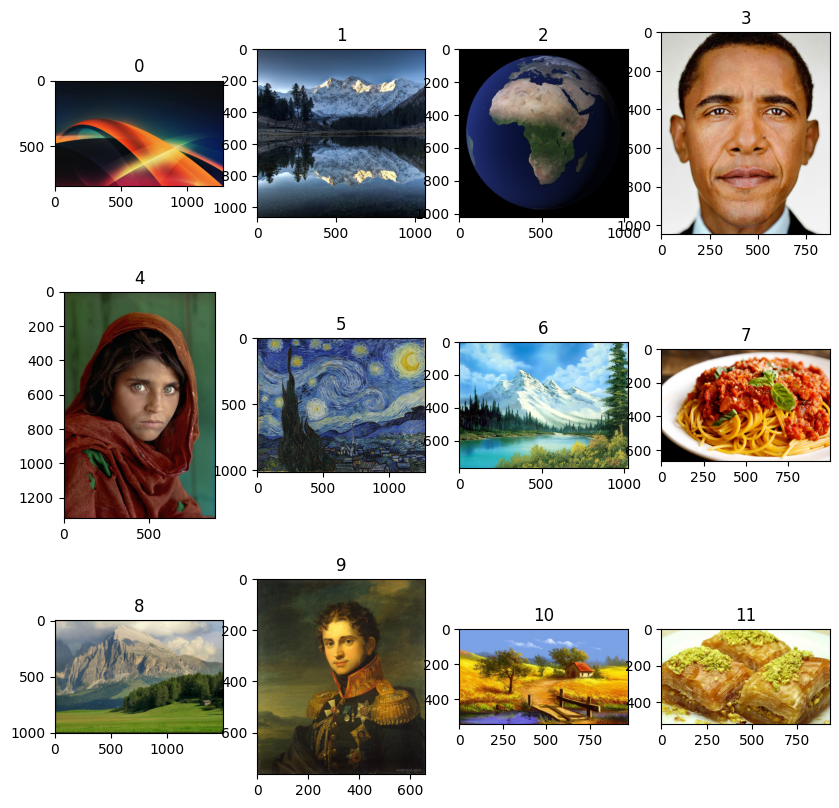

In [1]:
import os
import numpy as np
from PIL import Image
import cv2
from matplotlib import pyplot as plt

def euclidean_distance(a, b):
    return np.linalg.norm(a - b)

def getLuminance(image):
    yuv_image = cv2.cvtColor(image, cv2.COLOR_RGB2YUV)
    Y = yuv_image[:,:,0]
    hist, _ = np.histogram(Y, bins = 256, range=(0,256))
    return hist

def getColorContent(image):
    hist = cv2.calcHist([image], [0, 1, 2], None, [8, 8, 8],[0, 256, 0, 256, 0, 256])
    return hist.flatten()

def getEdges(image):
    gray_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    blurred_image = cv2.GaussianBlur(gray_image, (3,3), 0)
    edges = cv2.Canny(blurred_image, 100, 200)
    hist, _ = np.histogram(edges, bins=256, range=(0, 256))
    return hist

def load_images(folder):
    images = []
    for filename in os.listdir(folder):
        if filename.endswith(".jpg") or filename.endswith(".png"):
            img = Image.open(os.path.join(folder, filename)).convert("RGB")
            images.append(img)
    return images


def compute_rankings(imageNumber, images):
    image = images[imageNumber]
    image = np.array(image)
    colorImg = getColorContent(image)
    luminanceImg = getLuminance(image)
    edgesImg = getEdges(image)

    differenceLuminance = []
    differenceColorContent = []
    differenceEdges = []

    for i, img in enumerate(images):
        img = np.array(img)
        differenceColorContent.append((euclidean_distance(colorImg, getColorContent(img)), i))
        differenceLuminance.append((euclidean_distance(luminanceImg, getLuminance(img)), i))
        differenceEdges.append((euclidean_distance(edgesImg, getEdges(img)), i))

    rankingColor = sorted(differenceColorContent, key=lambda x: x[0])
    rankingLuminance = sorted(differenceLuminance, key=lambda x: x[0])
    rankingEdges = sorted(differenceEdges, key=lambda x: x[0])

    finalRanking = np.zeros(len(images))
    for i in range(len(finalRanking)):
        finalRanking[rankingColor[i][1]] += i * 0.1
        finalRanking[rankingLuminance[i][1]] += i * 0.1
        finalRanking[rankingEdges[i][1]] += i * 0.9

    return np.argsort(finalRanking)

def plot_ranked_images(images, rank):
    fig = plt.figure(figsize=(10, 10))
    for i in range(len(images)):
        fig.add_subplot(3, 4, i + 1)
        plt.imshow(images[rank[i]])
        plt.title(i)
    plt.show()

images = load_images("Lab3.1/")

imageNumber = 1
rank = compute_rankings(imageNumber, images)
plot_ranked_images(images, rank)


# Task 2